# Generowanie danych historycznych

- symulowanie błędów wprowadzania danych poprzez mnożenie * [0.01, 0.1, 10, 100]
- fluktuacje ceny w ramach wzrostu liniowego

In [72]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import math

def errorify(value):
    error_factors = [0.01,0.1,10,100]
    error_value = value * rnd.choice(error_factors)
    return error_value

def error_price(price):
    return errorify(price)

def error_quantity(quantity):
    return errorify(quantity)

def gen_product(orders_no, price_init, price_end, order_qunat_rng, error_prob, bend):
    price_curr = price_init
    price_diff = (price_end - price_init)
    price_delta = price_diff/orders_no
    product_orders = []
    for i in range(orders_no):
        price = round(price_curr + (rnd.uniform(-0.1,0.1) * price_diff), 2)
        quantity = rnd.randrange(order_qunat_rng[0], order_qunat_rng[1])
        if rnd.random() < error_prob:
            if rnd.random() > 0.5:
                price = error_price(price)
            else:
                quantity = error_quantity(quantity)
        product_orders.append((price, quantity))
        price_curr += price_delta * rnd.uniform(i/orders_no, 0.5 + (i/orders_no))

    return product_orders

Przykładowe dane na podstawie treści zadania

[(99.77, 33), (100.96, 40), (101.99, 44), (100.84, 370), (99.23, 34), (98.42, 5.0), (102.24, 37), (98.33, 38), (101.3, 4.3), (102.33, 43), (103.19, 38), (103.07, 33), (100.08, 33), (100.99, 48), (101.23, 49), (99.95, 32), (101.75, 44), (102.65, 50), (102.72, 46), (101.54, 38), (105.59, 42), (103.31, 37), (105.58, 40), (105.52, 42), (104.62, 31), (104.12, 3.7), (1065.3, 49), (103.29, 0.37), (104.61, 40), (104.55, 46), (105.2, 40), (106.46, 44), (105.61, 32), (107.16, 44), (109.71, 31), (109.74, 430), (106.75, 31), (10949.0, 36), (107.88, 35), (107.38, 43), (111.19, 43), (110.57, 0.48), (111.51, 0.46), (110.98, 37), (110.06, 43), (109.83, 31), (111.22, 37), (109.86, 42), (112.72, 0.39), (114.85, 4100), (114.98, 33), (115.18, 35), (1136.9, 48), (11.269, 46), (114.06, 35), (115.62, 45), (117.49, 33), (115.61, 34), (116.78, 33), (116.25, 43)]


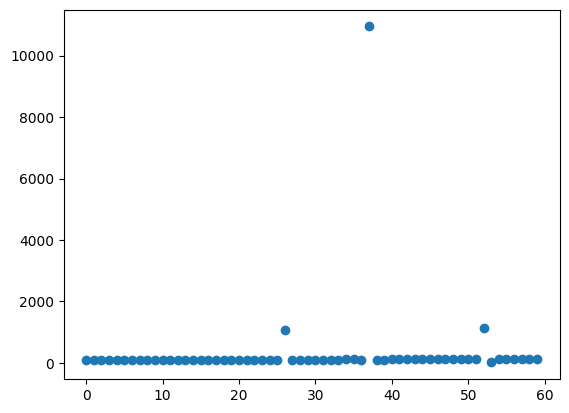

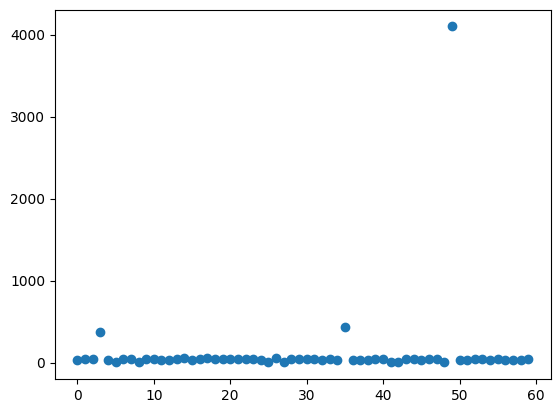

<Figure size 640x480 with 0 Axes>

In [73]:
product_sales = gen_product(60, 100, 124, (30,51), 0.2, 1)
print(product_sales)
x = [x for x in range(60)]
y_price = [x[0] for x in product_sales]
y_quantity = [x[1] for x in product_sales]
plt.scatter(x, y_price)
plt.show()
plt.clf()
plt.scatter(x, y_quantity)
plt.show()
plt.clf()

## Zastosowanie regresji liniowej do przybliżenia zależności

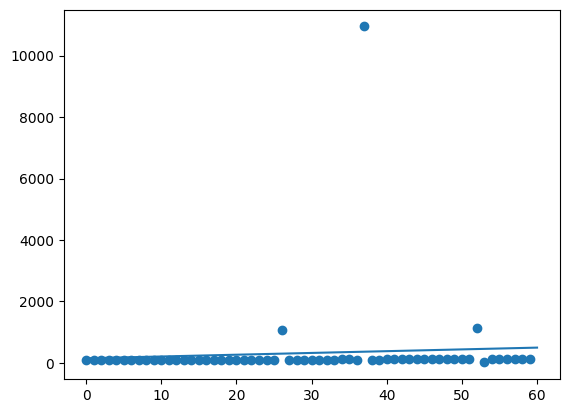

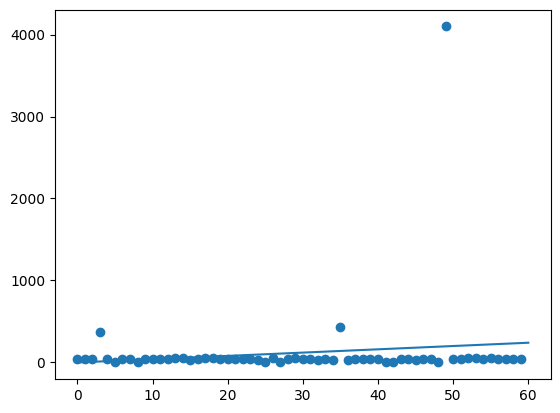

<Figure size 640x480 with 0 Axes>

In [74]:
def get_coeffs(x, y):
    x_np = np.array(x). reshape((-1,1))
    y_price = np.array(y)
    model_price = LinearRegression().fit(x_np, y_price)

    return (model_price.coef_[0], model_price.intercept_)

def print_with_approx(x, y, coeffs):
    n = len(x)
    plt.scatter(x, y)
    plt.plot([0,n], [coeffs[1], n * coeffs[0] + coeffs[1]])
    plt.show()
    plt.clf()

coeffs_p = get_coeffs(x, y_price)
coeffs_q = get_coeffs(x, y_quantity)
print_with_approx(x, y_price, coeffs_p)
print_with_approx(x, y_quantity, coeffs_q)

## Usuwanie odległych punktów w celu oczyszczenia danych

- zastosowanie regresji liniowej do przybliżenia zależności
- obliczenie odchylenia standardowego rezyduów (odległości wartości punktu od wartości przewidywanej)
- odrzucenie punktów o błędzie większym niż dwa odchylenia standardowe

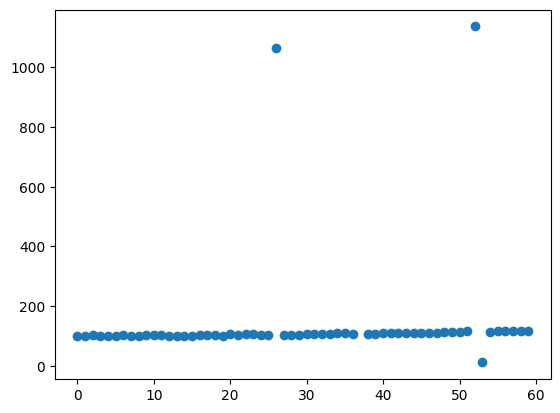

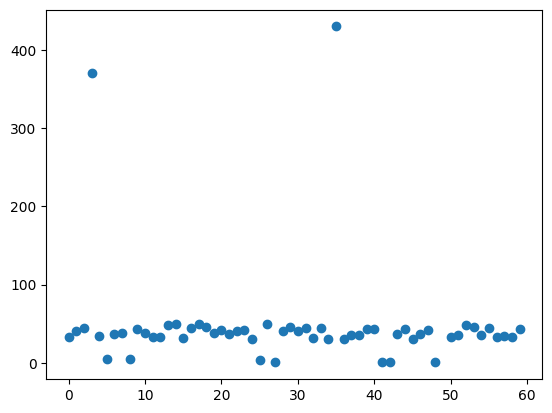

<Figure size 640x480 with 0 Axes>

In [75]:
def remove_outliers(x, y, coeffs):
    n = len(x)
    if n <= 2:
        return (x, y, 0)
    y_exp = [(x * coeffs[0] + coeffs[1]) for x in x]

    SSE = 0

    for i in range(n):
        SSE += (y[i] - y_exp[i])**2

    s = math.sqrt(SSE/(n-2))
    x_good = []
    y_good = []
    outlier_count = 0

    for i in range(n):
        if abs(y[i] - y_exp[i]) < abs(2 * s):
            x_good.append(i)
            y_good.append(y[i])
        else:
            outlier_count += 1

    return (x_good, y_good, outlier_count)

x_price, y_price, outlier_count_p = remove_outliers(x, y_price, coeffs_p)
x_quantity, y_quantity, outlier_count_q = remove_outliers(x, y_quantity, coeffs_q)

plt.scatter(x_price, y_price)
plt.show()
plt.clf()
plt.scatter(x_quantity, y_quantity)
plt.show()
plt.clf()

### Repetycja regresji liniowej póki istnieją punkty dużej dźwigni

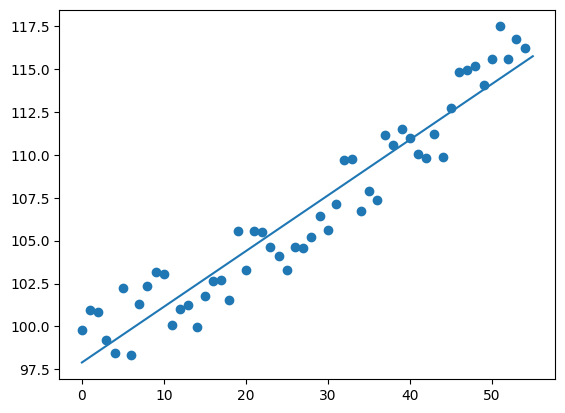

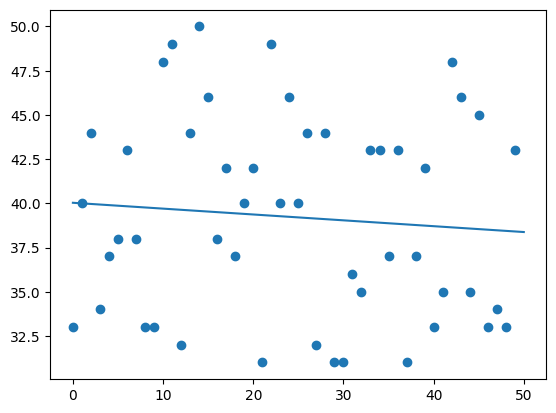

<Figure size 640x480 with 0 Axes>

In [76]:
coeffs_p = get_coeffs(x_price, y_price)
while outlier_count_p > 0:
    x_price, y_price, outlier_count_p = remove_outliers(x_price, y_price, coeffs_p)
    coeffs_p = get_coeffs(x_price, y_price)

coeffs_q = get_coeffs(x_quantity, y_quantity)
while outlier_count_q > 0:
    x_quantity, y_quantity, outlier_count_q = remove_outliers(x_quantity, y_quantity, coeffs_q)
    coeffs_q = get_coeffs(x_quantity, y_quantity)

print_with_approx(x_price, y_price, coeffs_p)
print_with_approx(x_quantity, y_quantity, coeffs_q)

# Implementacja ograniczeń na podstawie nierówności probabilistycznych

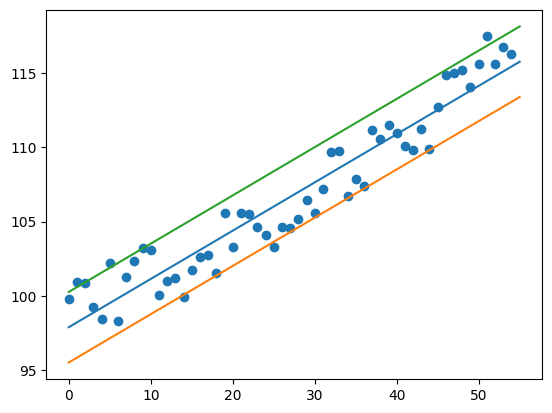

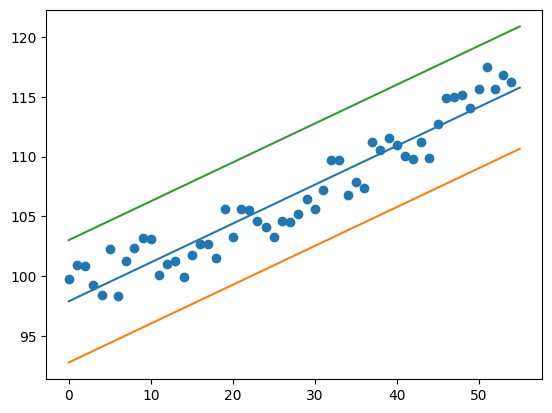

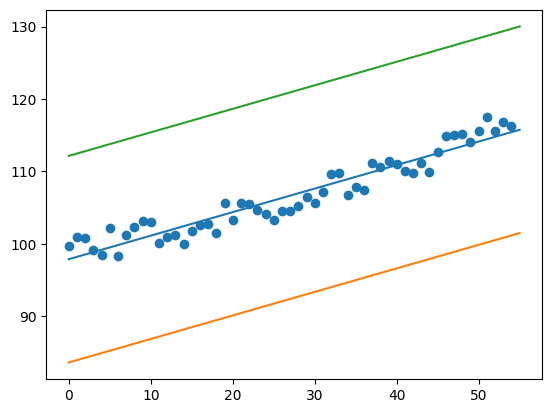

<Figure size 640x480 with 0 Axes>

In [81]:
def get_diffs(x,y,coeffs):
    n = len(x)
    y_exp = [(x * coeffs[0] + coeffs[1]) for x in x]
    return [y[i] - y_exp[i] for i in range(n)]

def get_threshold(diffs, alpha):
    n = len(diffs)
    diffs_abs = [abs(x) for x in diffs]
    diffs_abs.sort()
    return diffs_abs[math.floor(n * alpha)]

def get_threshold_markov(diffs, alpha):
    n = len(diffs)
    diffs_abs = [abs(x) for x in diffs]
    EX = sum(diffs_abs)/n
    return EX/(1-alpha)

def get_threshold_chebyshev(diffs, alpha):
    n = len(diffs)
    VarX = sum([x**2 for x in diffs])/(n-1)
    return math.sqrt(VarX/(1-alpha))

def print_with_threshold(x, y, coeffs, threshold):
    n = len(x)
    plt.scatter(x, y)
    plt.plot([0,n], [coeffs[1], n * coeffs[0] + coeffs[1]])
    plt.plot([0,n], [coeffs[1] - threshold, n * coeffs[0] + coeffs[1] - threshold])
    plt.plot([0,n], [coeffs[1] + threshold, n * coeffs[0] + coeffs[1] + threshold])
    plt.show()
    plt.clf()

diffs = get_diffs(x_price, y_price, coeffs_p)

print_with_threshold(x_price, y_price, coeffs_p, get_threshold(diffs, 0.9))
print_with_threshold(x_price, y_price, coeffs_p, get_threshold_chebyshev(diffs, 0.9))
print_with_threshold(x_price, y_price, coeffs_p, get_threshold_markov(diffs, 0.9))


### Sprawdzanie wiarygodności wprowadzanych danych

- obliczamy błąd nowego punktu względem prostej aproksymacyjnej
- sprawdzamy w które kryteria wpada

In [82]:
def check_plausability(x, y, coeffs, threshold):
    y_exp = (x * coeffs[0] + coeffs[1])
    if abs(y - y_exp) > threshold:
        return False
    return True

def print_all_checks(x, y, x_new, y_new, coeffs, alpha):
    diffs = get_diffs(x, y, coeffs)
    markov = check_plausability(x_new, y_new, coeffs, get_threshold_markov(diffs, alpha))
    chebyshev = check_plausability(x_new, y_new, coeffs, get_threshold_chebyshev(diffs, alpha))
    direct = check_plausability(x_new, y_new, coeffs, get_threshold(diffs, alpha))
    print("Markov: " + str(markov))
    print("Chebyshev: " + str(chebyshev))
    print("Direct: " + str(direct))

for alpha in [0.85,0.9,0.95,0.99]:
    print(alpha)
    print_all_checks(x_price, y_price, x_price[-1] + 1, 108, coeffs_p, alpha)

0.85
Markov: True
Chebyshev: False
Direct: False
0.9
Markov: True
Chebyshev: False
Direct: False
0.95
Markov: True
Chebyshev: False
Direct: False
0.99
Markov: True
Chebyshev: True
Direct: False


### Moduł testujący

- sprawdzamy odpowiedzi dla wartości kolejnego punktu odchylone o wielokrotności odchyleń standardowych

In [79]:
def check_plausability_all(x, y, x_new, y_new, coeffs):
    diffs = get_diffs(x, y, coeffs)
    markov = check_plausability(x_new, y_new, coeffs, get_threshold_markov(diffs, 0.85))
    chebyshev = check_plausability(x_new, y_new, coeffs, get_threshold_chebyshev(diffs, 0.95))
    direct = check_plausability(x_new, y_new, coeffs, get_threshold(diffs, 0.99))

    if sum([markov, chebyshev, direct]) > 1:
        return True
    return False

def test_plausability(x, y, y_given, coeffs):
    n = len(x)
    diffs = get_diffs(x, y, coeffs)
    s = math.sqrt(sum([x**2 for x in diffs])/(n-2))
    for a in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
        print("a = " + str(a) + ', ' + str(a*s))
        print(check_plausability_all(x, y, x[-1] + 1, y_given + (a * s), coeffs))
        print(check_plausability_all(x, y, x[-1] + 1, y_given - (a * s), coeffs))

test_plausability(x_price, y_price, 120, coeffs_p)
print()
test_plausability(x_quantity, y_quantity, 30, coeffs_q)

a = 0.0, 0.0
True
True
a = 0.5, 0.8165663070911634
True
True
a = 1.0, 1.6331326141823268
True
True
a = 1.5, 2.44969892127349
True
True
a = 2.0, 3.2662652283646536
False
True
a = 2.5, 4.082831535455817
False
True
a = 3.0, 4.89939784254698
False
True

a = 0.0, 0.0
True
True
a = 0.5, 2.8496912632982623
True
True
a = 1.0, 5.699382526596525
True
True
a = 1.5, 8.549073789894788
True
True
a = 2.0, 11.39876505319305
True
True
a = 2.5, 14.24845631649131
True
True
a = 3.0, 17.098147579789575
True
False
